In [1]:
from os.path import join

import numpy as np
from numpy import pi as π
from numpy.linalg import svd
from numpy.random import randn
from scipy.io import loadmat

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
plt.rcParams['font.size'] =  18
np.random.seed(42)

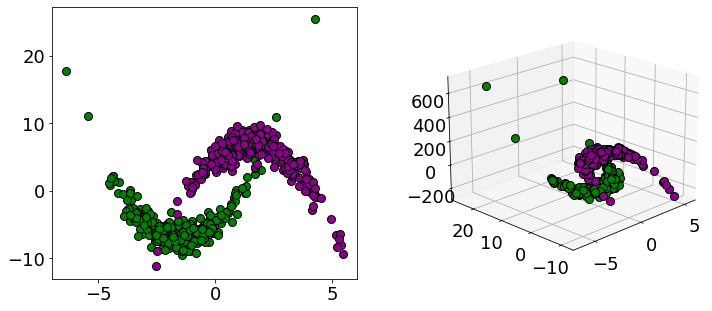

In [2]:
# Random ellipse

# Training set size
n = 300

x1 = 1.5 * randn(n) - 1.5
y1 = 1.2 * randn(n) + (x1 + 1.5)**2 - 7
x2 = 1.5 * randn(n) + 1.5
y2 = 1.2 * randn(n) - (x2-1.5)**2 + 7

z1 = x1**2 * y1
z2 = x2**2 * y2

fig = plt.figure(figsize=(12, 5))
axs = [
    fig.add_subplot(1, 2, 1),
    fig.add_subplot(1, 2, 2, projection='3d')
]

axs[0].plot(x1, y1, 'o', markerfacecolor='green', markeredgecolor='black', ms=8)
axs[0].plot(x2, y2, 'o', markerfacecolor='darkmagenta', markeredgecolor='black', ms=8)
axs[1].plot(x1, y1, z1, 'o', markerfacecolor='green', markeredgecolor='black', ms=8)
axs[1].plot(x2, y2, z2, 'o', markerfacecolor='darkmagenta', markeredgecolor='black', ms=8)
axs[1].view_init(20, -135);

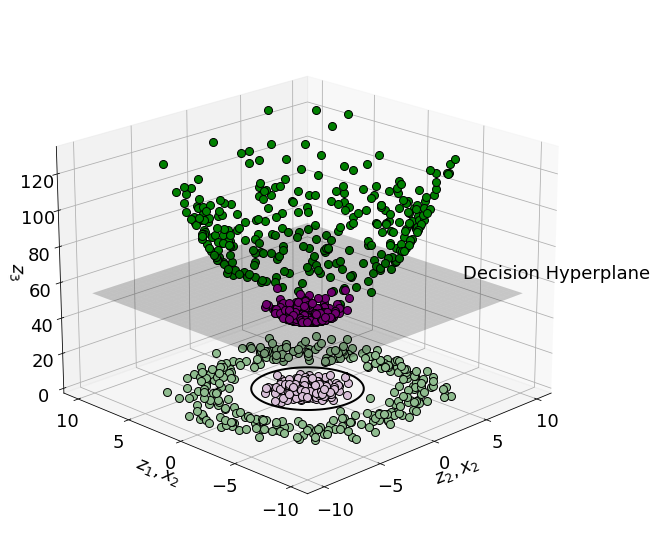

In [3]:
# Figure 5.23

r = 7 + randn(n)
θ = 2 * π * randn(n)
xr = r * np.cos(θ)
yr = r * np.sin(θ)
x5 = randn(n)
y5 = randn(n)

zr = xr**2 + yr**2
z5 = x5**2 + y5**2

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': '3d'})

ax.view_init(20, -135)

ax.plot(xr, yr, zr+40, 'o', markerfacecolor='green', markeredgecolor='black', ms=8)
ax.plot(x5, y5, z5+40, 'o', markerfacecolor='darkmagenta', markeredgecolor='black', ms=8)

x = np.arange(-10, 10.5, 0.5)
y = np.arange(-10, 10.5, 0.5)
X, Y = np.meshgrid(x, y)
F3 = 54 + 0*X + 0*Y

ax.plot_surface(X, Y, F3, cmap='gray', linewidth=0, antialiased=True, alpha=0.2)

ax.plot(xr, yr, np.zeros_like(xr), 'o', markerfacecolor='darkseagreen', markeredgecolor='black', ms=8)
ax.plot(x5, y5, np.zeros_like(x5), 'o', markerfacecolor='thistle', markeredgecolor='black', ms=8)

θ = np.linspace(0, 2*π, 100)
r = np.sqrt(14)
ax.plot(r * np.cos(θ), r * np.sin(θ), np.zeros_like(θ), '-', color='black', linewidth=2)

ax.set_xlabel('$z_2, x_2$')
ax.set_ylabel('$z_1, x_2$')
ax.set_zlabel('$z_3$')
ax.set_xticks([-10, -5, 0, 5, 10])
ax.set_yticks([-10, -5, 0, 5, 10])
ax.text2D(0.8, 0.5, "Decision Hyperplane", transform=ax.transAxes);

In [4]:
# Classify dogs vs. cats with Support Vector Classifier

# Wavelet encoded images
dogdata_w_mat = loadmat(join('..', 'DATA', 'dogData_w.mat'))
catdata_w_mat = loadmat(join('..', 'DATA', 'catData_w.mat'))

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

_, nimages = dog_wave.shape

CD = np.hstack((dog_wave, cat_wave))

U, S, VT = svd(CD - CD.mean(), full_matrices=False)
V = VT.T

ntrain = 60
ntest = nimages - ntrain
features = np.arange(1, 21)
cols = features - 1

train = np.concatenate((
    V[:ntrain, cols],
    V[nimages:nimages+ntrain, cols]
))
test = np.concatenate((
    V[ntrain:nimages, cols],
    V[nimages+ntrain:, cols]
))

labels = np.repeat([1, -1], ntrain)
truth = np.repeat([1, -1], ntest)

model = SVC(kernel='rbf', gamma='auto').fit(train, labels)
prediction = model.predict(test)

cross_val = cross_val_score(model, train, labels, cv=10) # cross-validate the model
class_loss = 1 - np.mean(cross_val) # average error over all cross-validation iterations

print(f'Class loss = {class_loss:0.4f}')

Class loss = 0.0750
